In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


➥ Number of duplicates in the dataset: 26
➥ Missing values before filling:
title      0
text       0
subject    0
date       0
label      0
dtype: int64
➥ Missing values after filling:
title      0
text       0
subject    0
date       0
label      0
dtype: int64
➥ Values before normalization:
['true' 'fake']
➥ Values after normalization:
['true' 'fake']
➥ Number of text_length outliers (|z| > 3): 108
➥ Final cleaned data preview:


,title,text,subject,date,label,text_length,title_length
7245,MEDIA HIDES TRUTH ABOUT #UnFitHillary: FALLS O...,#UnFit Hillary spoke to another small crowd to...,politics,15-Aug-16,fake,2633,126
9087,LOL! LEADER OF Do-Nothing Senate Mitch McCon...,Speaking at a Rotary Club gathering in Kentuck...,politics,09-Aug-17,fake,2143,135
989,EPA watchdog expands audit of administrator's ...,WASHINGTON (Reuters) - The U.S. Environmental ...,politicsNews,06-Oct-17,true,2709,58
2819,Baseball field shooting shakes American symbol...,WASHINGTON (Reuters) - The gunshots that rippe...,politicsNews,14-Jun-17,true,2838,59
7659,SHERIFF CLARKE OUTRAGED AT RALLY VIOLENCE:  W...,Sheriff Clarke weighs in on the violence at th...,left-news,07-Jun-16,fake,73,70


✅ First 5 rows of the dataset:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,subject,date,label,text_length,title_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,true,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,true,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,true,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,true,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,true,5204,69



✅ Summary of numerical columns:


,text_length,title_length
count,9461.000000,9461.000000
mean,2349.478808,78.520875
std,1479.193351,24.655043
min,1.000000,15.000000
25%,1168.000000,63.000000
50%,2230.000000,72.000000
75%,3184.000000,88.000000
max,5562.000000,286.000000



✅ Class Distribution:


,Label,Count
0,true,4973
1,fake,4488


+---+-------+-------+
|   | Label | Count |
+---+-------+-------+
| 0 | true  | 4973  |
| 1 | fake  | 4488  |
+---+-------+-------+


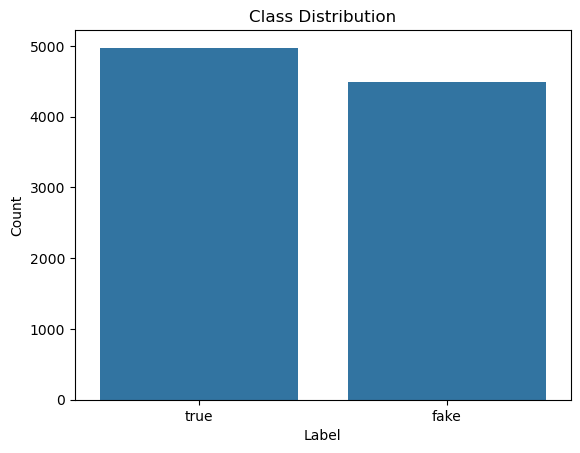

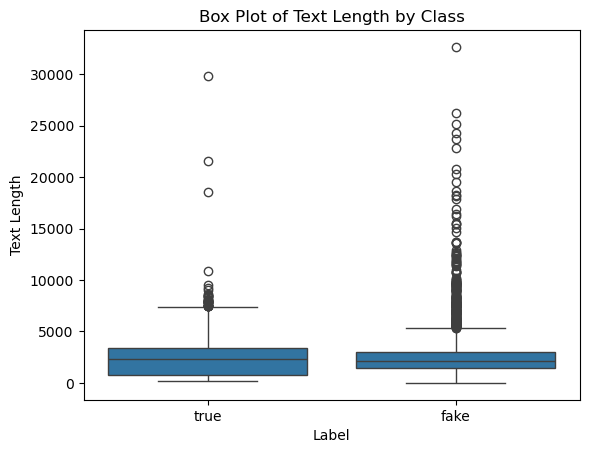

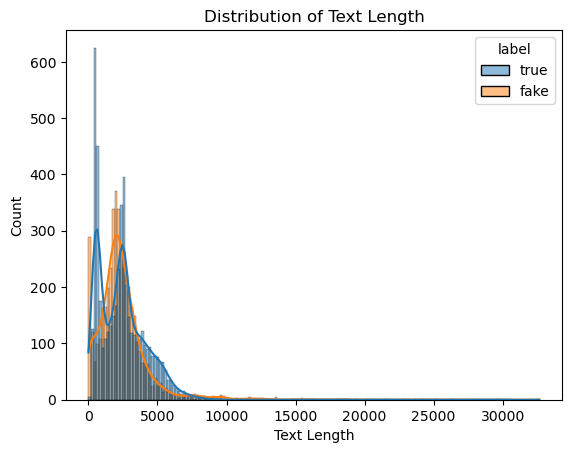

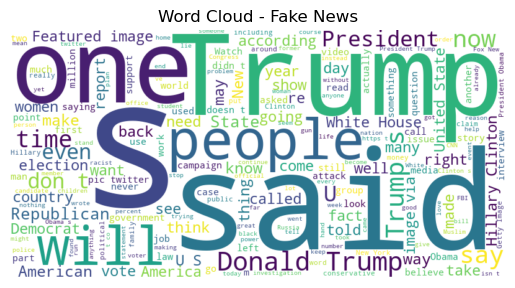

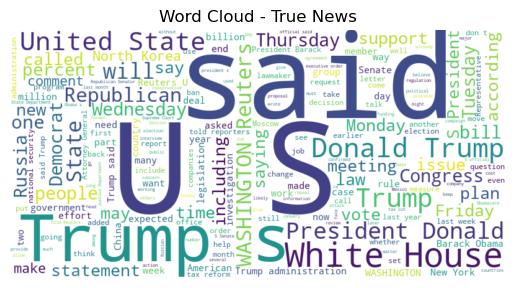

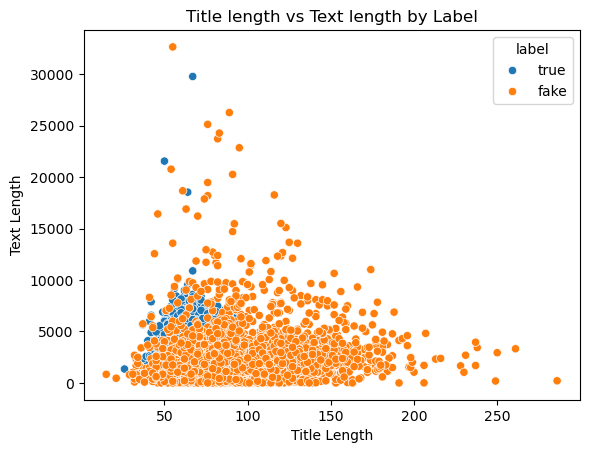

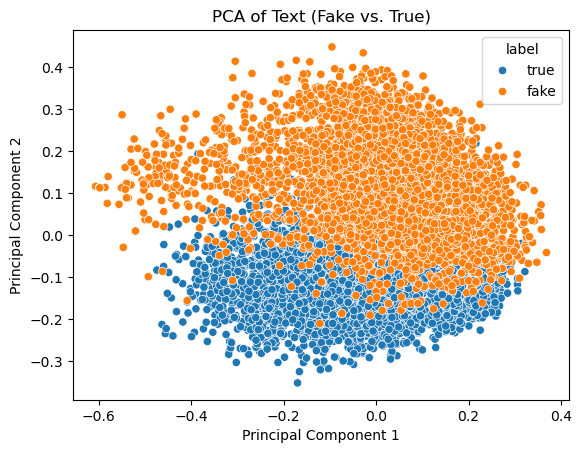

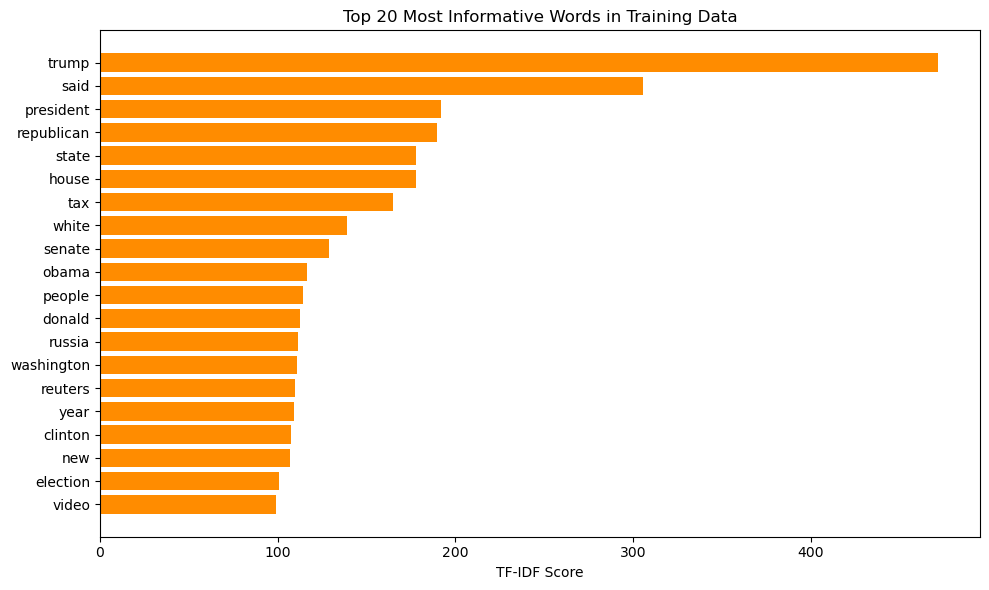

Accuracy : 0.9778129952456418
F1 Score : 0.9793713163064833
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       879
           1       0.98      0.98      0.98      1014

    accuracy                           0.98      1893
   macro avg       0.98      0.98      0.98      1893
weighted avg       0.98      0.98      0.98      1893



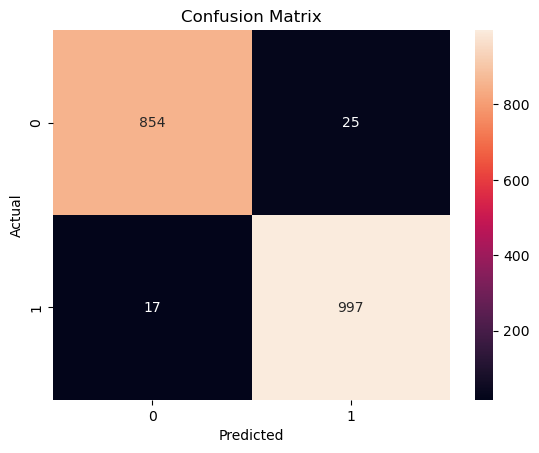

Best C : {'C': 100}
Best F1 Score : 0.9842231236031141
Optimized Accuracy : 0.9862651875330164
Optimized F1 Score : 0.987192118226601
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       879
           1       0.99      0.99      0.99      1014

    accuracy                           0.99      1893
   macro avg       0.99      0.99      0.99      1893
weighted avg       0.99      0.99      0.99      1893



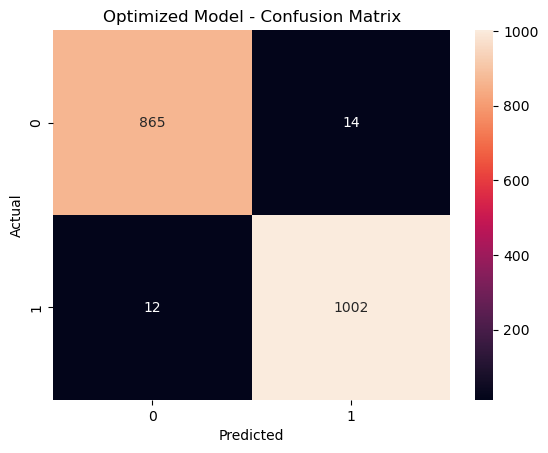

➥ Please enter your own news article.


➥ Title:  Trump wants Postal Service to charge 'much more' for Amazon shipments
➥ Text:  Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon


➥ Prediction : Fake News


'Fake News'

In [12]:
# ------------------------------------------------------------------------------
# 1️⃣ Import libraries
# ---------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from tabulate import tabulate
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, roc_auc_score



# ------------------------------------------------------------------------------
# 2️⃣ Loading the data
# ------------------------------------------------------------------------------
true = pd.read_csv(r"C:\\Users\\hp\\Desktop\\Sem 6\\AI\\Assignment\\true.csv", encoding='ISO-8859-1')
fake = pd.read_csv(r"C:\\Users\\hp\\Desktop\\Sem 6\\AI\\Assignment\\Final_Fake_Reduced_Cleaned.csv", encoding='ISO-8859-1')

true['label'] = 'true'
fake['label'] = 'fake'

# Combine into a single DataFrame
df = pd.concat([true, fake], ignore_index=True)

# ------------------------------------------------------------------------------
# 3️⃣ Data Cleaning
# ------------------------------------------------------------------------------

# ✅ 1. Remove duplicates
df = df.copy()
duplicate_count = df.duplicated().sum()
print(f"➥ Number of duplicates in the dataset: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)

# ✅ 2. Handle missing values
print("➥ Missing values before filling:")
print(df.isnull().sum())  

for col in ['title', 'text']:
    if df[col].isnull().sum() > 0:
        df[col].fillna('', inplace=True)

print("➥ Missing values after filling:")
print(df.isnull().sum())  

# ✅ 3. Fix incorrect data types
# (For this dataset, we know 'label' should be a string, 'title_length' and 'text_length' should be int)

if not pd.api.types.is_string_dtype(df['label']):
    df['label'] = df['label'].astype(str)

# We'll create title_length and text_length afterwards, ignoring this for now.

# ✅ 4. Correct inconsistent values (such as different cases in label)

print("➥ Values before normalization:")
print(df['label'].unique())  

df['label'] = df['label'].str.lower()
df['label'] = df['label'].replace({'true': 'true', 'false': 'fake'})
print("➥ Values after normalization:")
print(df['label'].unique())  

# ✅ 5. Detect and handle outliers
# We'll use Z-score to find and cap text_length and title_length afterwards
from scipy.stats import zscore

# First create length columns
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

# Apply Z-score
zscores = zscore(df['text_length'])

threshold = 3
outliers = (np.abs(zscores) > threshold).sum()
print(f"➥ Number of text_length outliers (|z| > {threshold}): {outliers}")

# We'll cap the outliers at the 95th percentile
cap = df['text_length'].quantile(0.95)
df.loc[df['text_length'] > cap, 'text_length'] = cap

# ✅ 6. Drop irrelevant columns
# If there were IDs or URLs not required for analysis, we could drop them here.
irrelevant_columns = ['url'] if 'url' in df.columns else []
if irrelevant_columns:
    df = df.drop(irrelevant_columns, axis=1)

print("➥ Final cleaned data preview:")
display(df.sample(5))


# Text cleaning function for user inputs


nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# ------------------------------------------------------------------------------
# 3️⃣ Data Exploration (Cleaner Display)
# ------------------------------------------------------------------------------

print("✅ First 5 rows of the dataset:")
display(df.head())  # If you are using Jupyter notebook; otherwise, use:
# print(tabulate(df.head(), headers='keys', tablefmt='pretty')) 
# (you'd need to `pip install tabulate` first)

print("\n✅ Summary of numerical columns:")
display(df.describe())  # Again, nicely formatted in notebook; fallback to tabulate if not in notebook

print("\n✅ Class Distribution:")
label_counts = df['label'].value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Count']

# Display nicely
display(label_df)

# or if you want a clear text format:
print(tabulate(label_df, headers='keys', tablefmt='pretty'))
#print(tabulate(label_df, headers='keys', tablefmt='pretty'))
 

# ------------------------------------------------------------------------------
# 4️⃣ Preprocessing
# ------------------------------------------------------------------------------
# Create a new column for text length
df['text_length'] = df['text'].apply(len)

# Title length might be useful
df['title_length'] = df['title'].apply(len)

# ------------------------------------------------------------------------------
# 5️⃣ Visualizations
# ------------------------------------------------------------------------------

# Count Plot (Class Distribution)
plt.figure()
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Box Plot (Text Length Distribution by Class)
plt.figure()
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Box Plot of Text Length by Class')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

# Histogram (Distribution of Text Length)
plt.figure()
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# ------------------------------------------------------------------------------
# 6️⃣ Word Cloud (Most frequently used words in fake and true news)
# ---------------------------------------------------------------------------
fake_news = ' '.join(fake['text'].tolist()) 
true_news = ' '.join(true['text'].tolist())  

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news)

plt.figure()
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud - True News')
plt.axis('off')
plt.show()

# ------------------------------------------------------------------------------
# 7️⃣ Scatter Plot (Title length vs Text length by label)
# ---------------------------------------------------------------------------
plt.figure()
sns.scatterplot(data=df, x='title_length', y='text_length', hue='label')
plt.title('Title length vs Text length by Label')
plt.xlabel('Title Length')
plt.ylabel('Text Length')
plt.show()

# ------------------------------------------------------------------------------
# 8️⃣ PCA Scatter Plot to visualize clusters of fake vs true
# ---------------------------------------------------------------------------
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['text'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  

df_pca = pd.DataFrame({"pca1": X_pca[:, 0],
                       "pca2": X_pca[:, 1],
                       "label": df['label']})

plt.figure()
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='label')
plt.title('PCA of Text (Fake vs. True)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# ------------------------------------------------------------------------------
# 🔹 9️⃣ Prepare data for Model (Label Encoding, Combine Title and Text)
# ------------------------------------------------------------------------------

# 1 = true news, 0 = fake news
df['label'] = df['label'].apply(lambda x: 1 if x == 'true' else 0)

# Combine title and text
df['content'] = df['title'].apply(str) + " " + df['text'].apply(str)

# ⚠️ Apply the same cleaning used during preprocessing
df['content'] = df['content'].apply(clean_text)

# ------------------------------------------------------------------------------
# 🔹 10️⃣ Split into Train and Test
# ------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

X = df['content'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# ------------------------------------------------------------------------------
# 🔹 11️⃣ Text vectorization
# ------------------------------------------------------------------------------

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Get feature names and importance scores from training TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X_train_tfidf.sum(axis=0).A1  # Sum TF-IDF scores across all training documents

# Get top N features
top_n = 20
top_indices = np.argsort(tfidf_scores)[-top_n:]

# Plot
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in top_indices], tfidf_scores[top_indices], color='darkorange')
plt.xlabel("TF-IDF Score")
plt.title("Top 20 Most Informative Words in Training Data")
plt.tight_layout()
plt.savefig("tfidf_top_words.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------------------------------------------------------
# 🔹 12️⃣ Logistic Regression Model Training
# ------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

# ------------------------------------------------------------------------------
# 🔹 13️⃣ Evaluation
# ------------------------------------------------------------------------------

y_pred = model.predict(X_test_tfidf)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ------------------------------------------------------------------------------
# 🔹 14️⃣ Hyperparameter Tuning (optional, for improvement)

param_grid = {"C":[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=500), 
                    param_grid, scoring='f1', cv=5)

grid.fit(X_train_tfidf, y_train)

print("Best C :", grid.best_params_)
print("Best F1 Score :", grid.best_score_)

optimized_model = LogisticRegression(C=grid.best_params_['C'], max_iter=500)
optimized_model.fit(X_train_tfidf, y_train)

y_pred_optimized = optimized_model.predict(X_test_tfidf)

print("Optimized Accuracy :", accuracy_score(y_test, y_pred_optimized))
print("Optimized F1 Score :", f1_score(y_test, y_pred_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))

conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d')
plt.title('Optimized Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ------------------------------------------------------------------------------
# 🔹 15️⃣ Manual Prediction with User Input
# ------------------------------------------------------------------------------

def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)

#
# ------------------------------------------------------------------------------
# 🔹 Example usage:
# ------------------------------------------------------------------------------






In [13]:
# Pick a known true article from the original dataset
true_sample = df[df['label'] == 1].iloc[0]  # Get first real news row
sample_title = true_sample['title']
sample_text = true_sample['text']

print("✅ Testing with known real news from dataset:")
print("➤ Title:", sample_title)
print("➤ Text:", sample_text[:200], "...")  # Truncated for readability

# Now use your manual prediction function
predict_news(sample_title, sample_text)


✅ Testing with known real news from dataset:
➤ Title: As U.S. budget fight looms, Republicans flip their fiscal script
➤ Text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a fiscal  ...
➥ Prediction : True News


'True News'

In [14]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:  As U.S. budget fight looms, Republicans flip their fiscal script
➥ Text:  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts


➥ Prediction : True News


'True News'

In [15]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:  Ex-U.S. NSA employee pleads guilty to taking classified documents
➥ Text:  A former U.S. National Security Agency employee pleaded guilty on Friday to illegally taking classified information outside the spy agency that an intelligence official said was later stolen from his home computer by Russian hackers. Nghia Hoang Pho, who worked in the NSA’s elite hacking unit, retained U.S. government documents containing top-secret national defense information between 2010 and March 2015, the Justice Department said.


➥ Prediction : True News


'True News'

In [16]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:  House to vote on federal budget next week: House Speaker Ryan
➥ Text:  The U.S. House of Representatives will vote on the federal budget next week, U.S. House Speaker Paul Ryan said on Thursday, adding that passing legislation on government spending will help clear the way for action on taxes. “We’re bringing it to the floor next week in the House,” Ryan told CNBC in an interview. 


➥ Prediction : True News


'True News'

In [17]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:   Ben & Jerry’s Ice Cream Founders Get Arrested At U.S. Capitol
➥ Text:  The co-founders of Ben & Jerry s Ice Cream, Ben Cohen, and Jerry Greenfield, were two of the 1200+ arrested in the past week at the U.S. Capitol to protest the influence big money has in politics as part of the Democracy Spring movement.


➥ Prediction : Fake News


'Fake News'

In [18]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:  Trump to announce terrorism list decision on North Korea next week: White House
➥ Text:  President Donald Trump will announce his decision next week on whether to put North Korea on a U.S. list of state sponsors of terrorism, the White House said on Thursday. I believe the president will be making an announcement ... on that at the first part of next week, White House spokeswoman Sarah Sanders said at a news briefing. 


➥ Prediction : True News


'True News'

In [20]:
def predict_news(title, text):
    """Predict whether a news article is true or fake."""
    content = title + " " + text
    cleaned_content = clean_text(content)  # Apply same preprocessing as training
    vector = vectorizer.transform([cleaned_content]) 
    pred = optimized_model.predict(vector)[0]
    result = "True News" if pred == 1 else "Fake News"

    print("➥ Prediction :", result)
    return result


# Ask the user to enter their own title and text
print("➥ Please enter your own news article.")
input_title = input("➥ Title: ")
input_text = input("➥ Text: ")

# Perform prediction
predict_news(input_title, input_text)


➥ Please enter your own news article.


➥ Title:  NOT KIDDING: ARIZONA NEWSPAPER Concerned Border Fence Too High For Illegals To Cross Safely
➥ Text:  When the fence keeps them from making it to the polls, the Democrats start complaining  A mainstream Arizona newspaper is decrying the small section of the Arizona-Mexico border that has a 14-foot-high primary fence because it is too high for illegal immigrants to safely cross.


➥ Prediction : Fake News


'Fake News'